# pandas with fortune500

we open a csv file for analysis first, but we could also fetch the data via http.

In [210]:
import pandas as pd
d = pd.read_csv("fortune500.csv")

In [211]:
d.head(2)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8


In [212]:
len(d)

25500

In [213]:
d.columns = ["year", "rank", "company", "revenue_mio", "profit_mio"]

In [214]:
d.head(1)

,year,rank,company,revenue_mio,profit_mio
0,1955,1,General Motors,9823.5,806


In [215]:
d.year

0        1955
1        1955
2        1955
3        1955
4        1955
         ... 
25495    2005
25496    2005
25497    2005
25498    2005
25499    2005
Name: year, Length: 25500, dtype: int64

In [216]:
d.year.min(), d.year.max()

(1955, 2005)

In [217]:
d.profit_mio

0          806
1        584.8
2        195.4
3        212.6
4         19.1
         ...  
25495      493
25496    175.4
25497     57.8
25498     70.6
25499      584
Name: profit_mio, Length: 25500, dtype: object

Next step is to examine the data types and see how pandas understood our inputs. 


In [218]:
d.dtypes

year             int64
rank             int64
company         object
revenue_mio    float64
profit_mio      object
dtype: object

> Note that the profit is actually an `object` instead of expected `float64`. 

> we need to identify those rows in the profit column, where the value is not a number

1. we use the regex `r'[^0-9.-]'` to find those values dont are not a number
2. `d.loc[not_a_number]` shows the rows which have such a field (in our case they are N.A.)

In [219]:
not_a_number = d.profit_mio.str.contains(r'[^0-9.-]')
d.loc[not_a_number]

,year,rank,company,revenue_mio,profit_mio
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,N.A.
24296,2003,297,Land O'Lakes,5847.0,N.A.
24435,2003,436,Roundy's,3637.9,N.A.
24489,2003,490,Ace Hardware,3029.0,N.A.


> what is the percentage of "broken" data to "valid" data in percent?

In [220]:
broken_ratio = len(d.profit_mio[not_a_number]) / len(d) * 100

print(f"{broken_ratio:.2f}% of the values that are not a number.")

1.45% of the values that are not a number.


In [221]:
# add matplotlib features to jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# add beautification
import seaborn as sns
sns.set(style="darkgrid")


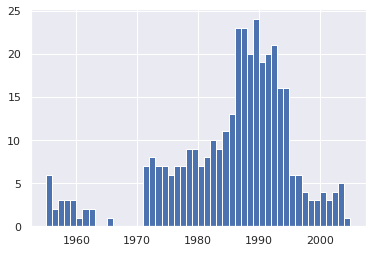

In [222]:
# we use matplotlib to plot an histogram of the broken data

_, _, _ = plt.hist(d.year[not_a_number], bins=range(1955, 2006))

> see that missing values are on average 10-15 per year

> not more than 25 values are missing in a given year

In [223]:
# find all broken values or verify that all broken values are the same
# maybe some fields contains something else than "N.A."
set(d.profit_mio[not_a_number])

{'N.A.'}

To create the cleaned data we just assign a new data frame using a `not_a_number` like a filter

In [224]:
cleaned = d.loc[~not_a_number]

In [225]:
cleaned.head()

,year,rank,company,revenue_mio,profit_mio
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


Though the field tpe of the data is still object and not float64:

In [226]:
cleaned.dtypes

year             int64
rank             int64
company         object
revenue_mio    float64
profit_mio      object
dtype: object

since pandas not supersmart, we tell it now:

- the new cleaned data gets profit_mio field overwritten
- with the result of pd.to_numeric 

In [227]:
cleaned.profit_mio = cleaned.profit_mio.apply(pd.to_numeric)

/tmp/ipykernel_2243169/2242226712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.profit_mio = cleaned.profit_mio.apply(pd.to_numeric)


In [228]:
cleaned.dtypes

year             int64
rank             int64
company         object
revenue_mio    float64
profit_mio     float64
dtype: object

In [229]:
len(d.profit_mio[not_a_number])

369

To check if the removed only the right values we can compare the length of the cleaned data with the original one

In [230]:
 len(d) - len(d.profit_mio[not_a_number]) == len(cleaned)

True

In [231]:
cleaned.dtypes

year             int64
rank             int64
company         object
revenue_mio    float64
profit_mio     float64
dtype: object

## lets extract some specific data and group it by year



In [232]:
by_year = cleaned.loc[:, ['year', 'revenue_mio', 'profit_mio']].groupby('year')
by_year.head()

,year,revenue_mio,profit_mio
0,1955,9823.5,806.0
1,1955,5661.4,584.8
2,1955,3250.4,195.4
3,1955,2959.1,212.6
4,1955,2510.8,19.1
...,...,...,...
25000,2005,288189.0,10267.0
25001,2005,270772.0,25330.0
25002,2005,193517.0,2805.0
25003,2005,172233.0,3487.0


In [233]:
by_year.mean().head()

,revenue_mio,profit_mio
year,,
1955,275.754453,16.732186
1956,323.604418,22.509237
1957,350.037626,23.181087
1958,377.977264,23.456740
1959,355.229376,19.279276


In [250]:
def plot(x, y, ax, color):
    ax.plot(x, y, color=color)
    ax.margins(.01, .01)

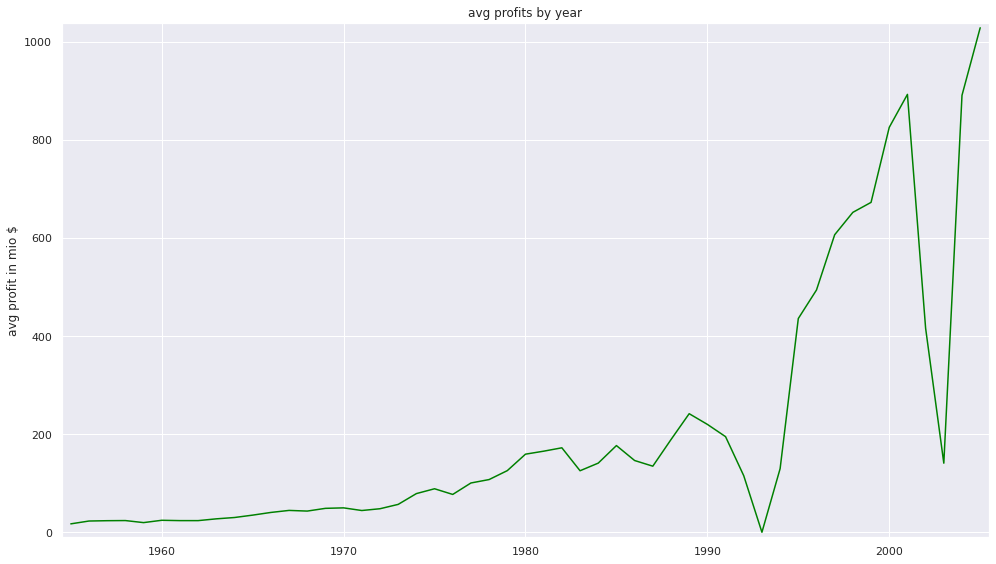

In [252]:
avgs = by_year.mean()

fig, ax = plt.subplots()
ax.set_title("avg profits by year")
ax.set_ylabel("avg profit in mio $")
plot(avgs.index, avgs.profit_mio, ax, "green")



fig.set_size_inches(14, 8)
fig.tight_layout()

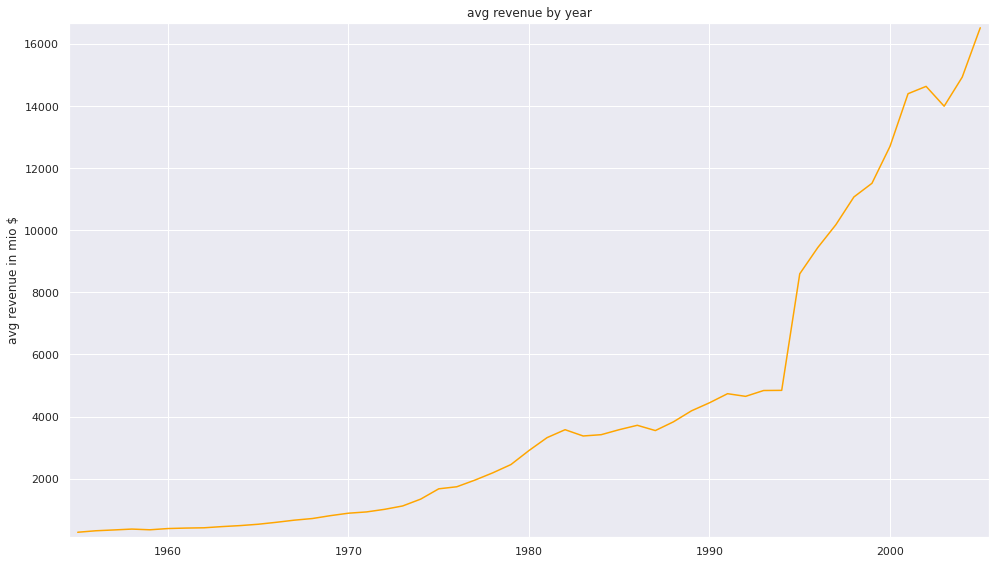

In [253]:
fig, ax = plt.subplots()
ax.set_title("avg revenue by year")
ax.set_ylabel("avg revenue in mio $")
plot(avgs.index, avgs.revenue_mio, ax, "orange")


fig.set_size_inches(14, 8)
fig.tight_layout()

The next improvement is to plot to figures on the same chart, as it helps to correlate the changes:

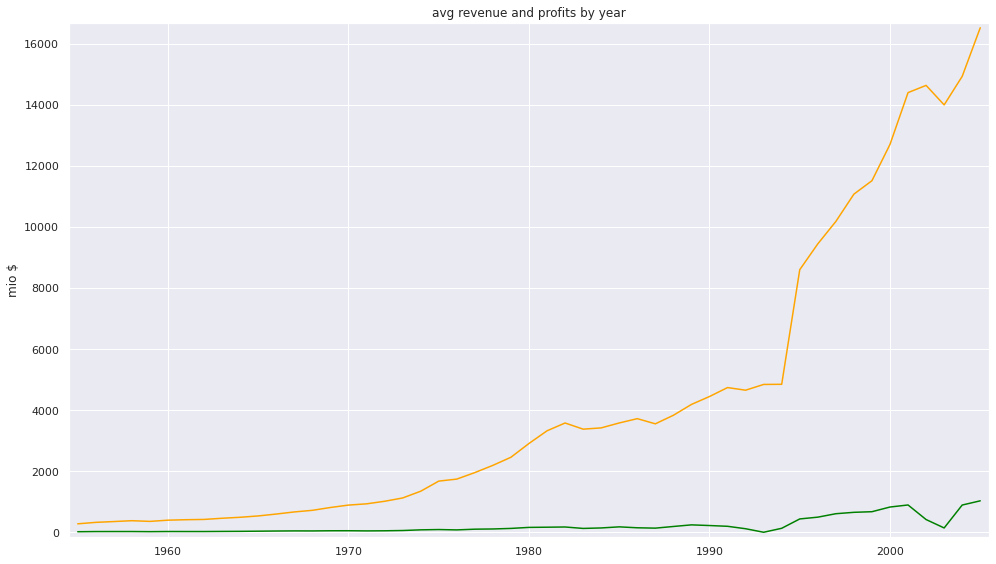

In [254]:
fig, ax  = plt.subplots()
ax.set_title("avg revenue and profits by year")
ax.set_ylabel("mio $")

plot(avgs.index, avgs.profit_mio, ax, "green")
plot(avgs.index, avgs.revenue_mio, ax, "orange")

fig.set_size_inches(14, 8)
fig.tight_layout()

> Oh snap! the green figure is magnitudes smaller than the yellow one. Now we cant see details that well. We need to create a second y axis with a different scale, interval and/or unit.


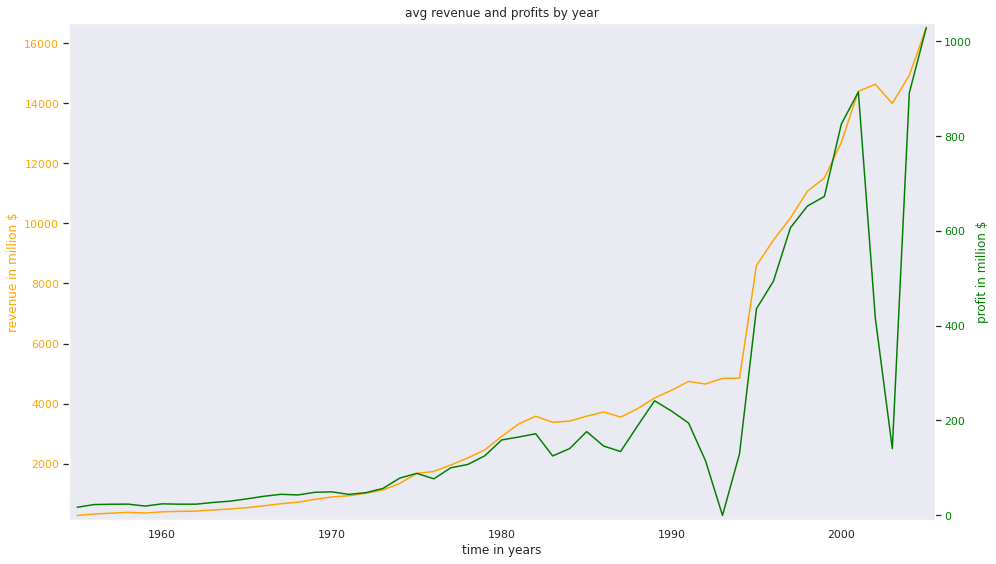

In [264]:
with sns.axes_style("dark"):
    fig, ax1  = plt.subplots()

    ax1.set_title("avg revenue and profits by year")

    ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

    ax1.set_xlabel("time in years")
    ax1.set_ylabel("revenue in million $", color="orange")
    ax1.tick_params(axis="y", labelcolor="orange")

    ax2.set_ylabel("profit in million $",  color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    plot(avgs.index, avgs.profit_mio, ax2, "green")
    plot(avgs.index, avgs.revenue_mio, ax1, "orange")

    fig.set_size_inches(14, 8)
    fig.tight_layout()


### Now lets investigate standart deviation:

In [257]:
# lets define new plot function that can show it on the graph

def plot_with_std_dev(x, y, std_dev, ax, color):
    ax.fill_between(x, y - std_dev, y + std_dev, color=color, alpha=0.05)
    plot(x, y, ax, color)
    

Lets compute the standart deviations now:

In [240]:
std_profit = by_year.std().profit_mio


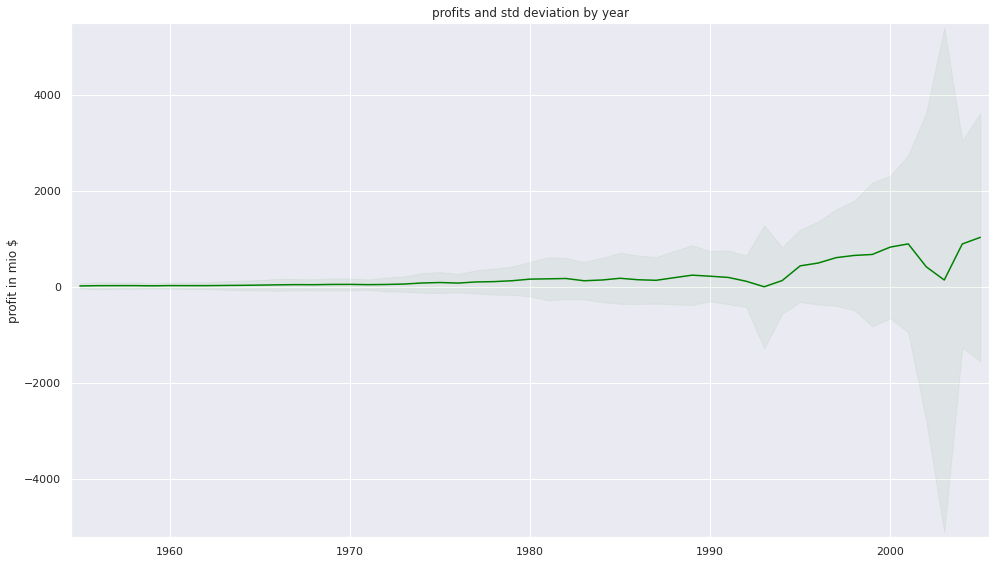

In [260]:
fig, ax  = plt.subplots()
ax.set_title("profits and std deviation by year")
ax.set_ylabel("profit in mio $")
plot_with_std_dev(avgs.index, avgs.profit_mio, std_profit, ax, "green")

fig.set_size_inches(14, 8)
fig.tight_layout()

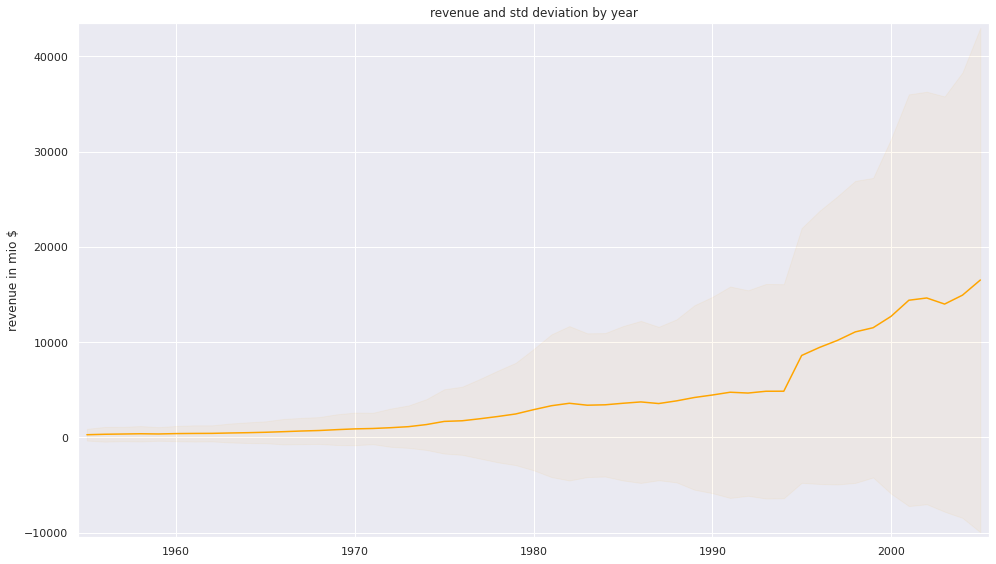

In [262]:
std_revenue = by_year.std().revenue_mio

fig, ax  = plt.subplots()
ax.set_title("revenue and std deviation by year")
ax.set_ylabel("revenue in mio $")
plot_with_std_dev(avgs.index, avgs.revenue_mio, std_revenue, ax, "orange")

fig.set_size_inches(14, 8)
fig.tight_layout()

 ### Below we use numpy to create a approximation curve with a polynomial.
 
 - What is a polynomial generally?
 - How a polynomial can approximated a curve
 - why would we do this?

a polynomial is a function following this expression:

$$f(x) = \sum\limits_{k=0}^{n}a_{k}x^k$$

> `k` being the number that defines the degree (sometimes called order) of the polynomial.

> the value `f(x)` being the sum of `n` terms $$a_{k}x^k$$ composing the polynomial.

> For example:

$$f(x) = 6x^3-4x^2+1x^1-3x^0$$


The point of creating such a function is that we can use to interpolate between sparse sample data, or use mathematical tricks to analyse the data further. Remember for example the infromation that can be gained from $$f'(x)$$ and $$f''(x)$$ to find maxima and minima, ie. turning points.

Another trick is creating the integral of the function to measure the area below the curve.

### lets show a code already:

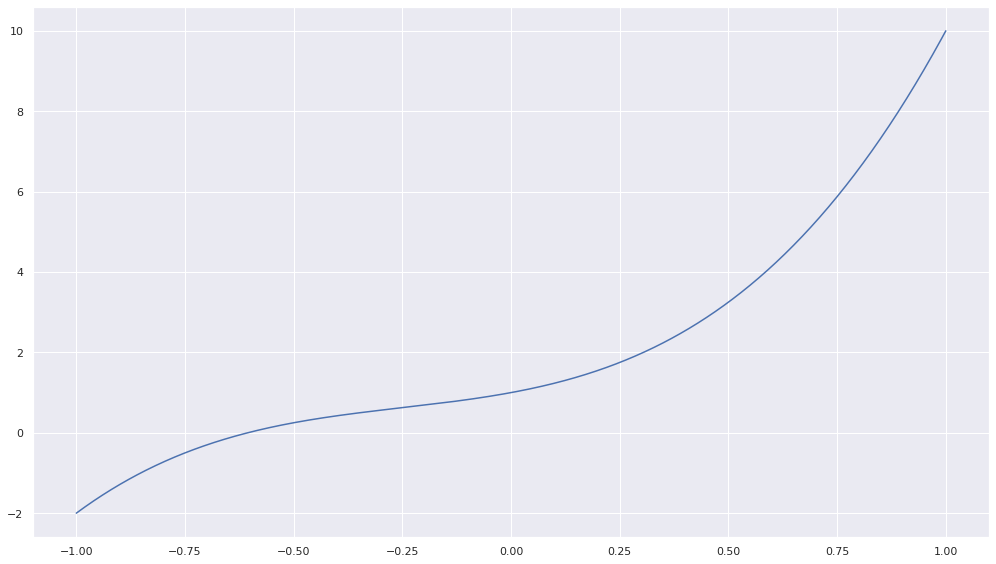

In [263]:
import numpy as np

def Polynomial(x, coeffs):
    y = 0
    for i in range(len(coeffs)):
        y += coeffs[i]*x**i
    return y

fig, ax  = plt.subplots()
x = np.linspace(-1, 1, 1000)

# these values are defining the shape of the polynomial
# each value corresponds with a factor `a` in the summation formula above. 
coeffs = [1, 2, 3, 4]

_ = ax.plot(x, Polynomial(x, coeffs))

fig.set_size_inches(14, 8)
fig.tight_layout()

> Note that by choosing the right coefficients, you can approxmiate another curve.

> Note that you use a computer, which should be able to figure those coefficents out for you.

See below:

In [244]:
approximation = np.polyfit(
    avgs.index.to_numpy(), 
    avgs.revenue_mio.to_numpy(), 
    deg=5  
)

> Please note the conversion from pandas dataframe to numpy ndarray with `.to_numpy()`. This is important and must be considered while plotting the data too.

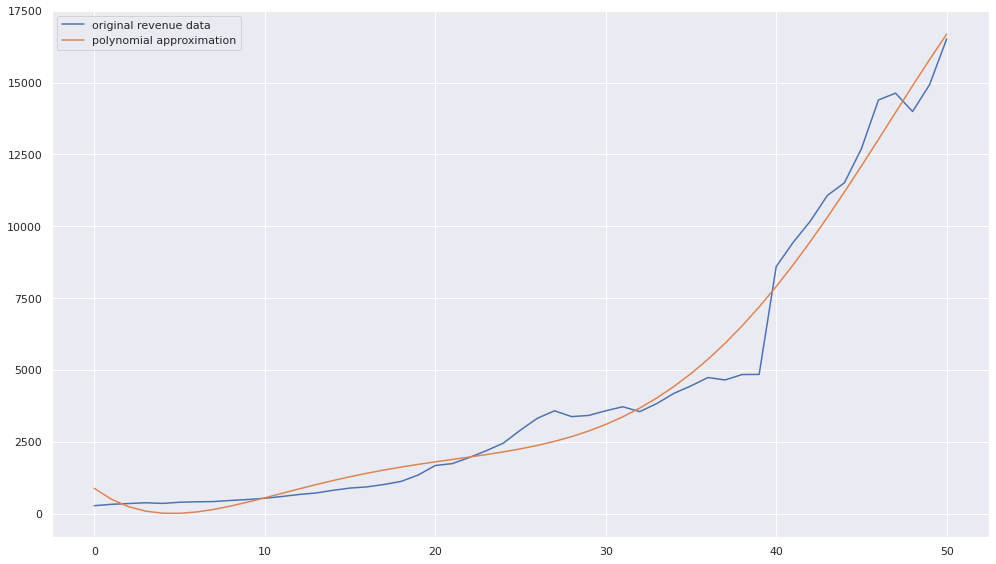

In [245]:
fig, ax  = plt.subplots()

ax.plot(avgs.revenue_mio.to_numpy(), label='original revenue data')
ax.plot(np.polyval(approximation, avgs.index.to_numpy()), label='polynomial approximation')


ax.legend()

fig.set_size_inches(14, 8)
fig.tight_layout()

> Note how the polynomial fit is not precise in the beginning and end of the data, but provides a smoothened approximation everywhere else.

> Note that polynomial degree can be tweaked, and that higher degrees _may_ approximate better, but not necessarily

> Note that higher degrees are more computationally intensive and can overflow. (degree > 50)

Lets use the polyfit method for the proft data:


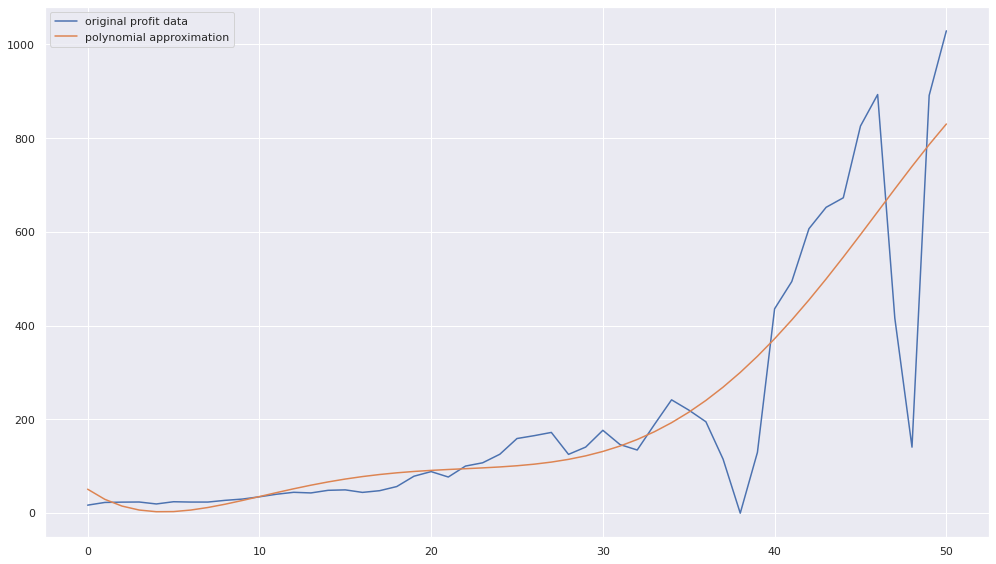

In [246]:
approximation = np.polyfit(
    avgs.index.to_numpy(), 
    avgs.profit_mio.to_numpy(), 
    deg=5,
)

fig, ax  = plt.subplots()

ax.plot(avgs.profit_mio.to_numpy(), label='original profit data')
ax.plot(np.polyval(approximation, avgs.index.to_numpy()), label='polynomial approximation')


ax.legend()

fig.set_size_inches(14, 8)
fig.tight_layout()

> Note the caveat of the method with wildly fluctuating data.

> We would need to compute many polynomials to approximate the data better.

> Note that we lost magic date formatting on X axis after we converted to numpy. We can get it back

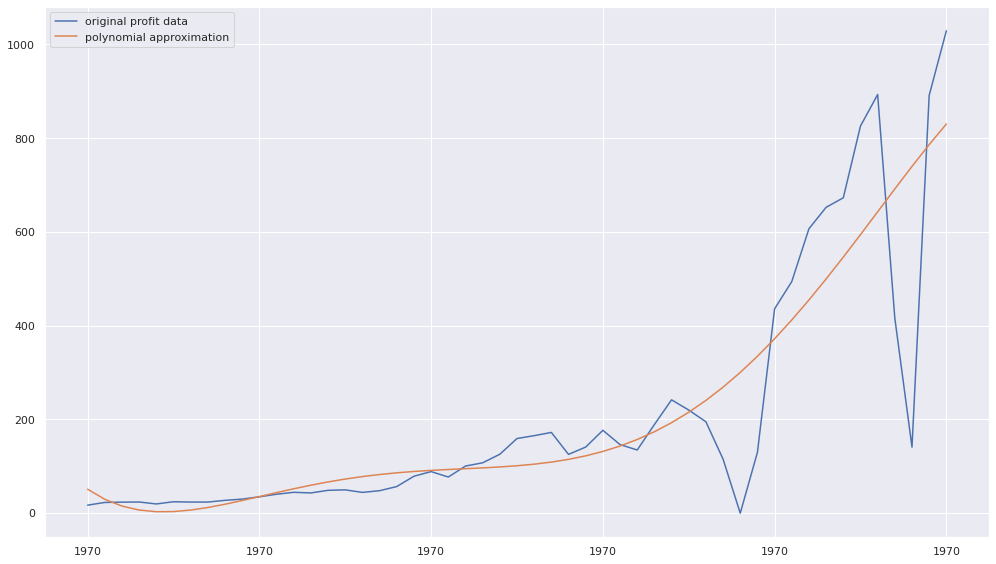

In [247]:
from matplotlib.dates import YearLocator, DateFormatter

fig, ax  = plt.subplots()

ax.xaxis.set_major_formatter(DateFormatter("%Y"))

ax.plot(avgs.profit_mio.to_numpy(), label='original profit data')
ax.plot(np.polyval(approximation, avgs.index.to_numpy()), label='polynomial approximation')

ax.legend()

fig.set_size_inches(14, 8)
fig.tight_layout()